In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [4]:
# Cargar el dataset
df_train = pd.read_csv('/content/drive/MyDrive/laboratorios_IA/SegundoParcial/dataset_1/Clean_Dataset.csv')

# Separar la columna 'price'
df_features = df_train.drop(columns=['Unnamed: 0', 'price'])

# Convertir las columnas categóricas a numéricas
df_features = pd.get_dummies(df_features, columns=['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'], drop_first=True)

# Escalar los datos
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

In [4]:
# Aplicar K-means con un número de clusters (por ejemplo, 5)
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(df_features_scaled)

# Agregar las etiquetas de cluster al dataframe original
df_train['cluster'] = kmeans.labels_

# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


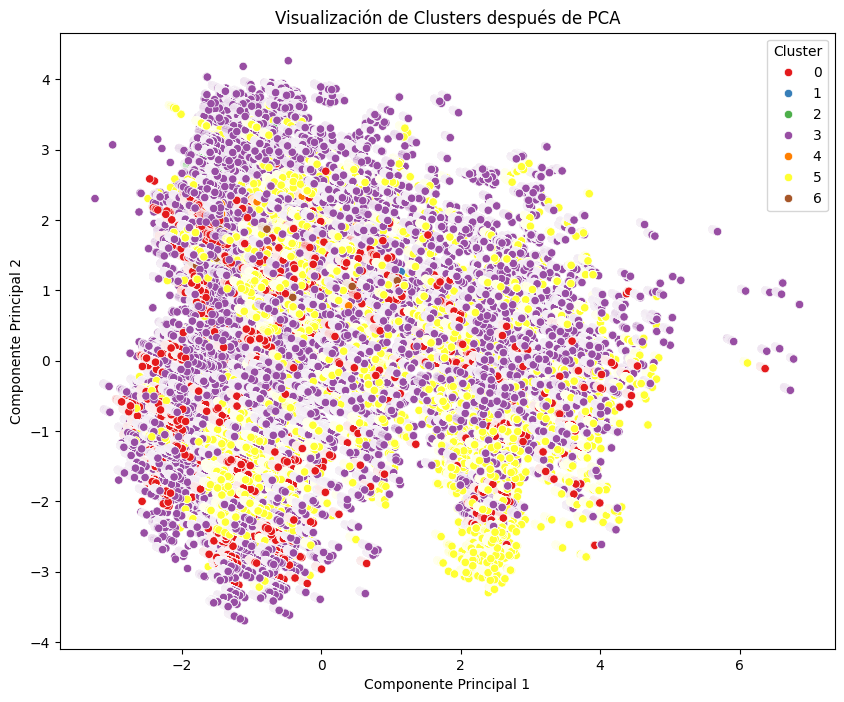

In [5]:
# Visualizar los clusters usando un diagrama de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df, palette='Set1')
plt.title('Visualización de Clusters después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [7]:
def plot_data(X, title=None):
    plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
    plt.xlabel("$x_1$", fontsize=14)
    if title:
        plt.title(title, fontsize=16)

def plot_centroids(centroids, circle_color='r', cross_color='w'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=200, linewidths=3,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=400, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="viridis", alpha=0.3)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    if show_centroids:
        plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1],
                    marker='o', s=250, linewidths=4,
                    color='r', zorder=12, alpha=0.9)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [7]:
# Inicializar KMeans con centros predeterminados y ajustar el modelo
n_clusters = 7
kmeans_iter1 = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=1, random_state=42)
kmeans_iter1.fit(principal_components)

kmeans_iter2 = KMeans(n_clusters=n_clusters, init=kmeans_iter1.cluster_centers_, n_init=1, max_iter=2, random_state=42)
kmeans_iter2.fit(principal_components)

kmeans_iter3 = KMeans(n_clusters=n_clusters, init=kmeans_iter2.cluster_centers_, n_init=1, max_iter=3, random_state=42)
kmeans_iter3.fit(principal_components)


kmeans_iter4 = KMeans(n_clusters=n_clusters, init=kmeans_iter3.cluster_centers_, n_init=1, max_iter=4, random_state=42)
kmeans_iter4.fit(principal_components)


KMeans(init=array([[-1.13684589,  2.40296463],
       [-1.42138225, -1.41578471],
       [-0.8391977 , -2.54365607],
       [-1.71965284, -0.07539551],
       [ 0.43718117,  1.43730775],
       [ 2.71708925, -0.35125335],
       [-0.02294444, -0.76116927]]),
       max_iter=4, n_clusters=7, n_init=1, random_state=42)

<ipython-input-6-1490d9d2e0c9>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
<ipython-input-6-1490d9d2e0c9>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
<ipython-input-6-1490d9d2e0c9>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
<ipython-input-6-1490d9d2e0c9>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


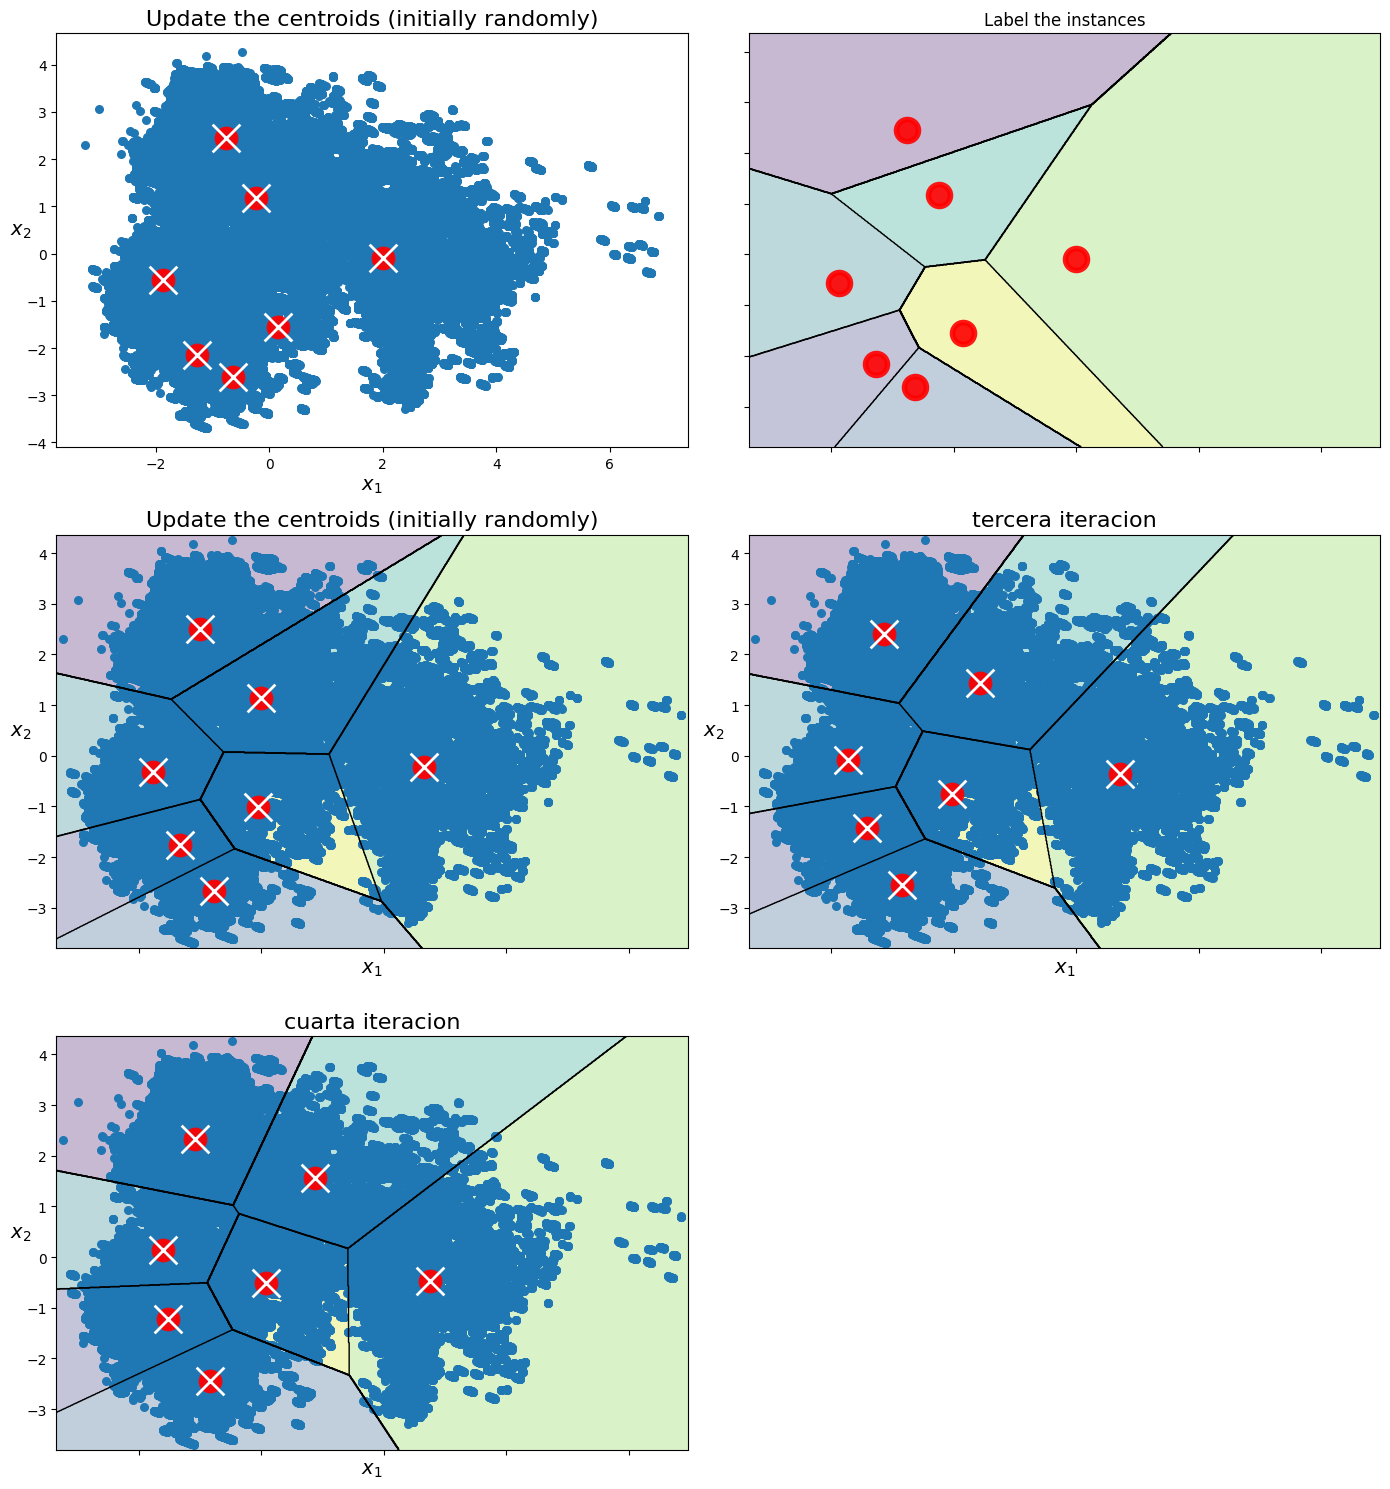

In [8]:
# Aquí es donde actualizamos tus subgráficos con las líneas de frontera

plt.figure(figsize=(14, 15))

plt.subplot(321)
plot_data(principal_components, title="Update the centroids (initially randomly)")
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, principal_components, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter2, principal_components, show_centroids=False, show_xlabels=False)
plot_data(principal_components, title="Update the centroids (initially randomly)")
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter3, principal_components, show_centroids=False, show_xlabels=False)
plot_data(principal_components, title="tercera iteracion")
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter4, principal_components, show_centroids=False, show_xlabels=False)
plot_data(principal_components, title="cuarta iteracion")
plot_centroids(kmeans_iter4.cluster_centers_)

plt.tight_layout()
plt.show()

mini-batch K-Means

In [5]:
from sklearn.cluster import MiniBatchKMeans

k = 7
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_mini_batch_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = df_features_scaled[np.random.choice(df_features_scaled.shape[0], init_size, replace=False)]
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = df_features_scaled[np.random.choice(df_features_scaled.shape[0], batch_size, replace=False)]
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_mini_batch_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_mini_batch_kmeans.sum_inertia_):
        best_mini_batch_kmeans = minibatch_kmeans

# Una vez finalizado el bucle, puedes acceder a las etiquetas de los clusters y los centroides:
labels_mini_batch = best_mini_batch_kmeans.labels_
centroids_mini_batch = best_mini_batch_kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [6]:
score = best_mini_batch_kmeans.score(df_features_scaled)
print("Score del modelo MiniBatchKMeans:", score)


Score del modelo MiniBatchKMeans: -475439395.3394178


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Lista para almacenar los valores de coeficiente de silueta
silhouette_scores = []

# Rango de valores de k que quieres probar
k_range = range(2, 8)  # Por ejemplo, de 2 a 8 clusters

for k in k_range:
    # Inicializa y ajusta el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features_scaled)  # Usamos df_features_scaled en lugar de df_train

    # Calcula el coeficiente de silueta
    silhouette_avg = silhouette_score(df_features_scaled, kmeans.labels_)  # Usamos df_features_scaled en lugar de X
    silhouette_scores.append(silhouette_avg)

# Grafica los valores de coeficiente de silueta en función de k
import matplotlib.pyplot as plt

plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes valores de k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
